In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import json
import numpy as np
from sklearn.ensemble import RandomForestClassifier

data= pd.read_json("/content/drive/My Drive/Fake news pro/1th Milestone/DATA/persian subjective tweets/LABELED.json",orient="split")
labeled_data = pd.read_json("/content/drive/My Drive/Fake news pro/1th Milestone/DATA/persian subjective tweets/LABELED.json",orient="split")

print("Schema:\n\n",data.dtypes)
print("Schema:\n\n",labeled_data.dtypes)
print("Number of questions,columns=",data.shape)
 
# corpus=corpus["text"]
# cv=CountVectorizer()
# vectorizer = TfidfVectorizer()
# word_count_vector=cv.fit_transform(corpus)
# X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())
# print(X.shape)
# print(word_count_vector)

Schema:

 has_media                     bool
hashtags                    object
img_urls                    object
is_replied                    bool
is_reply_to                   bool
likes                        int64
links                       object
parent_tweet_id             object
replies                      int64
reply_to_users              object
retweets                     int64
screen_name                 object
text                        object
text_html                   object
timestamp           datetime64[ns]
timestamp_epochs    datetime64[ns]
tweet_id                     int64
tweet_url                   object
user_id                      int64
username                    object
video_url                   object
Genre                        int64
dtype: object
Schema:

 has_media                     bool
hashtags                    object
img_urls                    object
is_replied                    bool
is_reply_to                   bool
likes                

In [2]:
import re
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("<!--?.*?-->","",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text
 
# data['text'] = df_idf['title'] + df_idf['body']
data['text'] = data['text'].apply(lambda x:pre_process(x))
print(data['text'][10])


خبر مقامات مالی قطر تمام خدمات مربوط به رمزارز را در این کشور مسدود کردند بله شاهد اتحاد کشور های اسلامی برای استفاده از رمزارز بیتکوین یا رمزارز واحد هستیم


In [3]:
def get_stop_words(stop_file_path):

    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)
 
#load a set of stop words
stopwords=get_stop_words("/content/drive/My Drive/stopwords.dat")
print(stopwords) 
#get the text column 
docs=data['text'].tolist()
 
cv=CountVectorizer(max_df=0.85,stop_words=stopwords)
word_count_vector=cv.fit_transform(docs)
 
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
x = tfidf_transformer.fit_transform(word_count_vector)

###list and adding vector


array_data = x.toarray()
print(array_data)
#print(array_data.shape)

data['vector'] = 1
data['vector'] = data['vector'].astype('object')


for item in np.arange(0, len(array_data)):
   data['vector'][item] = array_data[item]

print(data["vector"])


print("Schema:\n\n",data.dtypes)
print("Number of questions,columns=",data.shape)
# print(word_count_vector)
# print(x)
# print(x.shape)
# print(x.todense())
# print(x[2,:30].toarray())

FileNotFoundError: ignored

In [0]:
data.to_json("/content/drive/My Drive/vectorized.json")

In [5]:
from sklearn.cluster import MiniBatchKMeans
random_state = 0
cls = MiniBatchKMeans(n_clusters=4, random_state=random_state)
cls.fit(x)

NameError: ignored

In [6]:
cls.predict(x)
cls.labels_

NameError: ignored

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(x.toarray())
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

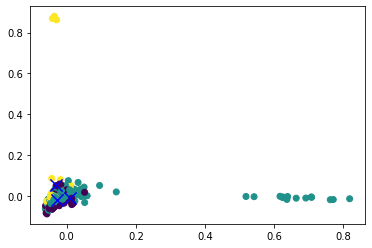

In [0]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(x))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

Random forests (supervised)